# Roc-Auc
`#roc_curve` `#roc_auc_score`
- Roc: TPR,FPR 를 이차원곡선으로 표현
- Auc: Roc 곡선의 면적
- Auc 면적이 1에 가까울수록 좋은 예측모델, 나쁘면 0.5 까지도 내려갈 수 있음
- 의학분야에서 많이 사용됨

<img alt="roc" src="./images/roc.png" width="300">


- FPR = FP / (FP + TN)
- TPR = TP / (FN + TP)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [2]:
from modules.classifier import MyDummyClassifier
from modules.classifier import MyFakeClassifier
from modules.preprocessing import transform_features

### 데이터셋 준비 & 예측

In [3]:
titanic_df = pd.read_csv('../../datasets/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=0)

lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

### ROC 곡선 만들고, 그리기

In [4]:
from sklearn.metrics import roc_curve

In [5]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
print("샘플 추출을 위한 임계값 배열의 index:", thr_index)
print("샘플 index로 추출한 임계값:", np.round(thresholds[thr_index], 2))

print("샘플 임계값별 FPR:", np.round(fprs[thr_index], 3))
print("샘플 임계값별 TPR:", np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값: [0.97 0.69 0.63 0.58 0.42 0.32 0.23 0.16 0.12 0.11 0.07]
샘플 임계값별 FPR: [0.    0.045 0.082 0.1   0.209 0.245 0.355 0.464 0.682 0.782 0.927]
샘플 임계값별 TPR: [0.014 0.536 0.565 0.71  0.797 0.855 0.884 0.928 0.928 0.942 0.971]


In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [7]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label="ROC")
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

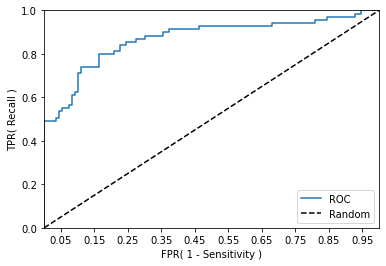

In [8]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### AUC 값 추출

In [9]:
from sklearn.metrics import roc_auc_score

In [10]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8704


In [11]:
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
         .format(accuracy, precision, recall, f1, roc_auc))

In [12]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도: 0.7465, 재현율: 0.7681, F1: 0.7571, AUC: 0.8704


In [3]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle='--', label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()